In [1]:
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt

from PerseusGammaCalibration import perseus_model_library
import minot

# Modify plotting parameters
dict_base = {'font.size':        16,
             'legend.fontsize':  16,
             'xtick.labelsize':  16,
             'ytick.labelsize':  16,
             'axes.labelsize':   16,
             'axes.titlesize':   16,
             'figure.titlesize': 16,    
             'figure.figsize':[8.0, 6.0],
             'figure.subplot.right':0.97,
             'figure.subplot.left':0.15,
             'font.family':'serif',
             'figure.facecolor': 'white',
             'legend.frameon': True}
plt.rcParams.update(dict_base)

In [2]:
# Reference model
cluster = perseus_model_library.default_model()

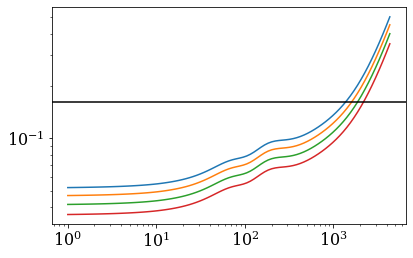

In [18]:
cluster.hse_bias = 0
r, f0 = cluster.get_fgas_profile()
cluster.hse_bias = 0.1
r, f1 = cluster.get_fgas_profile()
cluster.hse_bias = 0.2
r, f2 = cluster.get_fgas_profile()
cluster.hse_bias = 0.3
r, f3 = cluster.get_fgas_profile()
plt.plot(r,f0)
plt.plot(r,f1)
plt.plot(r,f2)
plt.plot(r,f3)
plt.axhline(cluster.cosmo.Ob0 / (cluster.cosmo.Odm0 + cluster.cosmo.Ob0), color='k')
plt.xscale('log')
plt.yscale('log')

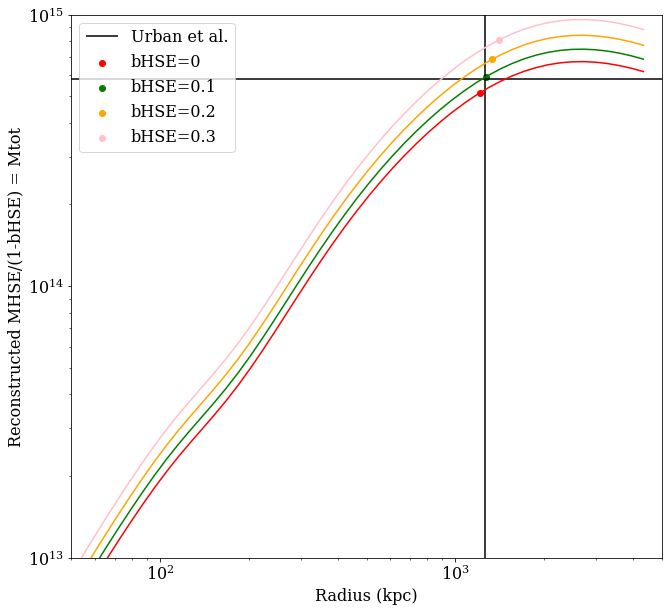

In [3]:
r,m = cluster.get_hse_mass_profile()

plt.figure(0, figsize=(10,10))
plt.vlines(cluster.R500.to_value('kpc'), 1e10,1e15, 'k', label='Urban et al.')
plt.hlines(cluster.M500.to_value('Msun'), 10,10000, 'k')

col = ['r', 'g', 'orange', 'pink']
cb = [0,0.1,0.2,0.3]
for i in range(len(cb)):
    plt.loglog(r,m/(1-cb[i]), color=col[i])
    cluster.hse_bias = cb[i]
    R500_b, M500_b = cluster.get_mdelta_from_profile(delta=500)
    plt.scatter(R500_b.to_value('kpc'), M500_b.to_value('Msun'), marker='o', color=col[i], label='bHSE='+str(cb[i]))
plt.xlim(50,5e3)
plt.ylim(1e13,1e15)
plt.xlabel('Radius (kpc)')
plt.ylabel('Reconstructed MHSE/(1-bHSE) = Mtot')
plt.legend()

In [4]:
cb = [0,0.1,0.2,0.3]

for i in range(len(cb)):
    cluster.hse_bias = cb[i]
    R500_b, M500_b = cluster.get_mdelta_from_profile(delta=500)
    print(R500_b, M500_b)

1212.4706029975212 kpc 515750849709285.25 solMass
1268.1833633995468 kpc 590163646550228.2 solMass
1332.400851359086 kpc 684433098801583.1 solMass
1407.7120215722903 kpc 807175102079754.5 solMass


In [5]:
# Set theta500 to Urban2013
cluster.theta500 = 59.7*u.arcmin
cluster.R500, cluster.M500

(<Quantity 1.25868987 Mpc>, <Quantity 5.770089e+14 solMass>)

In [6]:
cluster.theta500 = cluster.theta500+0.4*u.arcmin
print(cluster.R500, cluster.M500)

cluster.theta500 = cluster.theta500-2*0.4*u.arcmin
print(cluster.R500, cluster.M500)

1.2671233051356112 Mpc 588684952514161.0 solMass
1.2502564391770672 Mpc 565488267696492.6 solMass


In [7]:
# Print stat errors
print((5.88684953e+14 - 5.65488268e+14)/2*1e-14)
print((1.26712331-1.25025644)/2*1e3)

0.115983425
8.433434999999934
